# Support Vector Machines

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
df = pd.DataFrame(iris.data,columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df["target"]=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [7]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [8]:
df["flower_name"]= df.target.apply(lambda x:iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [9]:
df[45:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [10]:
df0=df[:50]
df1=df[50:100]
df2=df[100:]

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

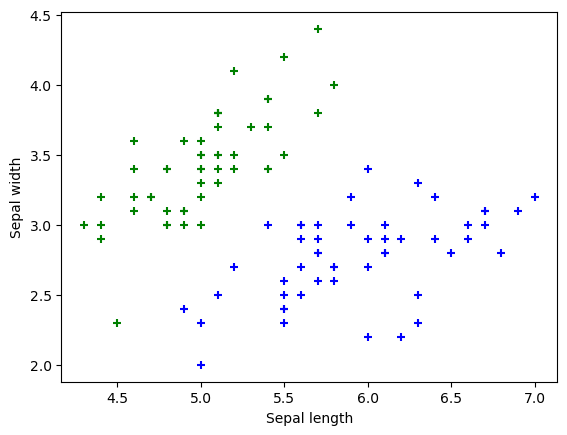

In [13]:
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.scatter(df0['sepal length (cm)'],df0 ["sepal width (cm)"],color="green",marker="+")
plt.scatter(df1['sepal length (cm)'],df1 ["sepal width (cm)"],color="blue",marker="+")

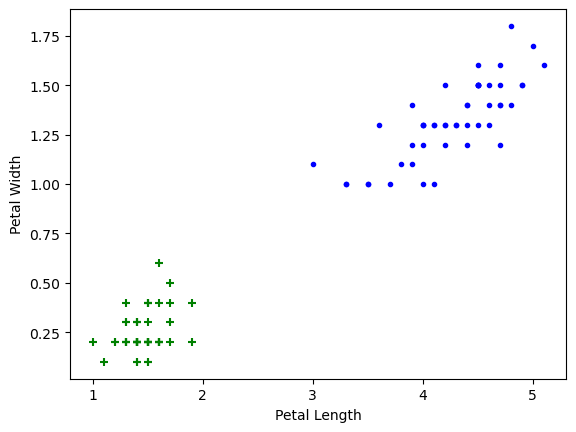

In [14]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')

In [15]:
from sklearn.model_selection import train_test_split
x = df.drop(['target','flower_name'],axis='columns')
y = df.target
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


In [16]:
len(x_train)

120

In [17]:
len(x_test)

30

In [20]:
from sklearn.svm import SVC
model = SVC()

In [21]:
model.fit(x_train,y_train)

SVC()

In [22]:
model.score(x_test,y_test)

0.9666666666666667

In [23]:
model.predict([[4.8,3.0,1.5,0.3]])

C:\Users\Welcome\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [24]:
# Tune Parameters

In [25]:
# 1) Regularization (c)
model_C = SVC(C = 1)
model_C.fit(x_train,y_train)
model_C.score(x_test,y_test)

0.9666666666666667

In [26]:
model_C = SVC(C = 10)
model_C.fit(x_train,y_train)
model_C.score(x_test,y_test)

1.0

In [27]:
# 2) Gamma
model_g = SVC(gamma = 1)
model_g.fit(x_train,y_train)
model_g.score(x_test,y_test)

0.9666666666666667

In [28]:
model_g = SVC(gamma = 10)
model_g.fit(x_train,y_train)
model_g.score(x_test,y_test)

0.9333333333333333

In [30]:
# 3) Kernel
model_linear_kernal = SVC(kernel="linear")
model_linear_kernal.fit(x_train,y_train)
model_linear_kernal.score(x_test,y_test)

1.0